In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

corr_matrix = df.corr()
heatmap_trace = go.Heatmap(
    x=corr_matrix.columns,y=corr_matrix.index, z=corr_matrix.values,
    colorscale='Viridis'
)

# Create figure
fig = go.Figure(data=[heatmap_trace])

# Show plot
pio.show(fig)


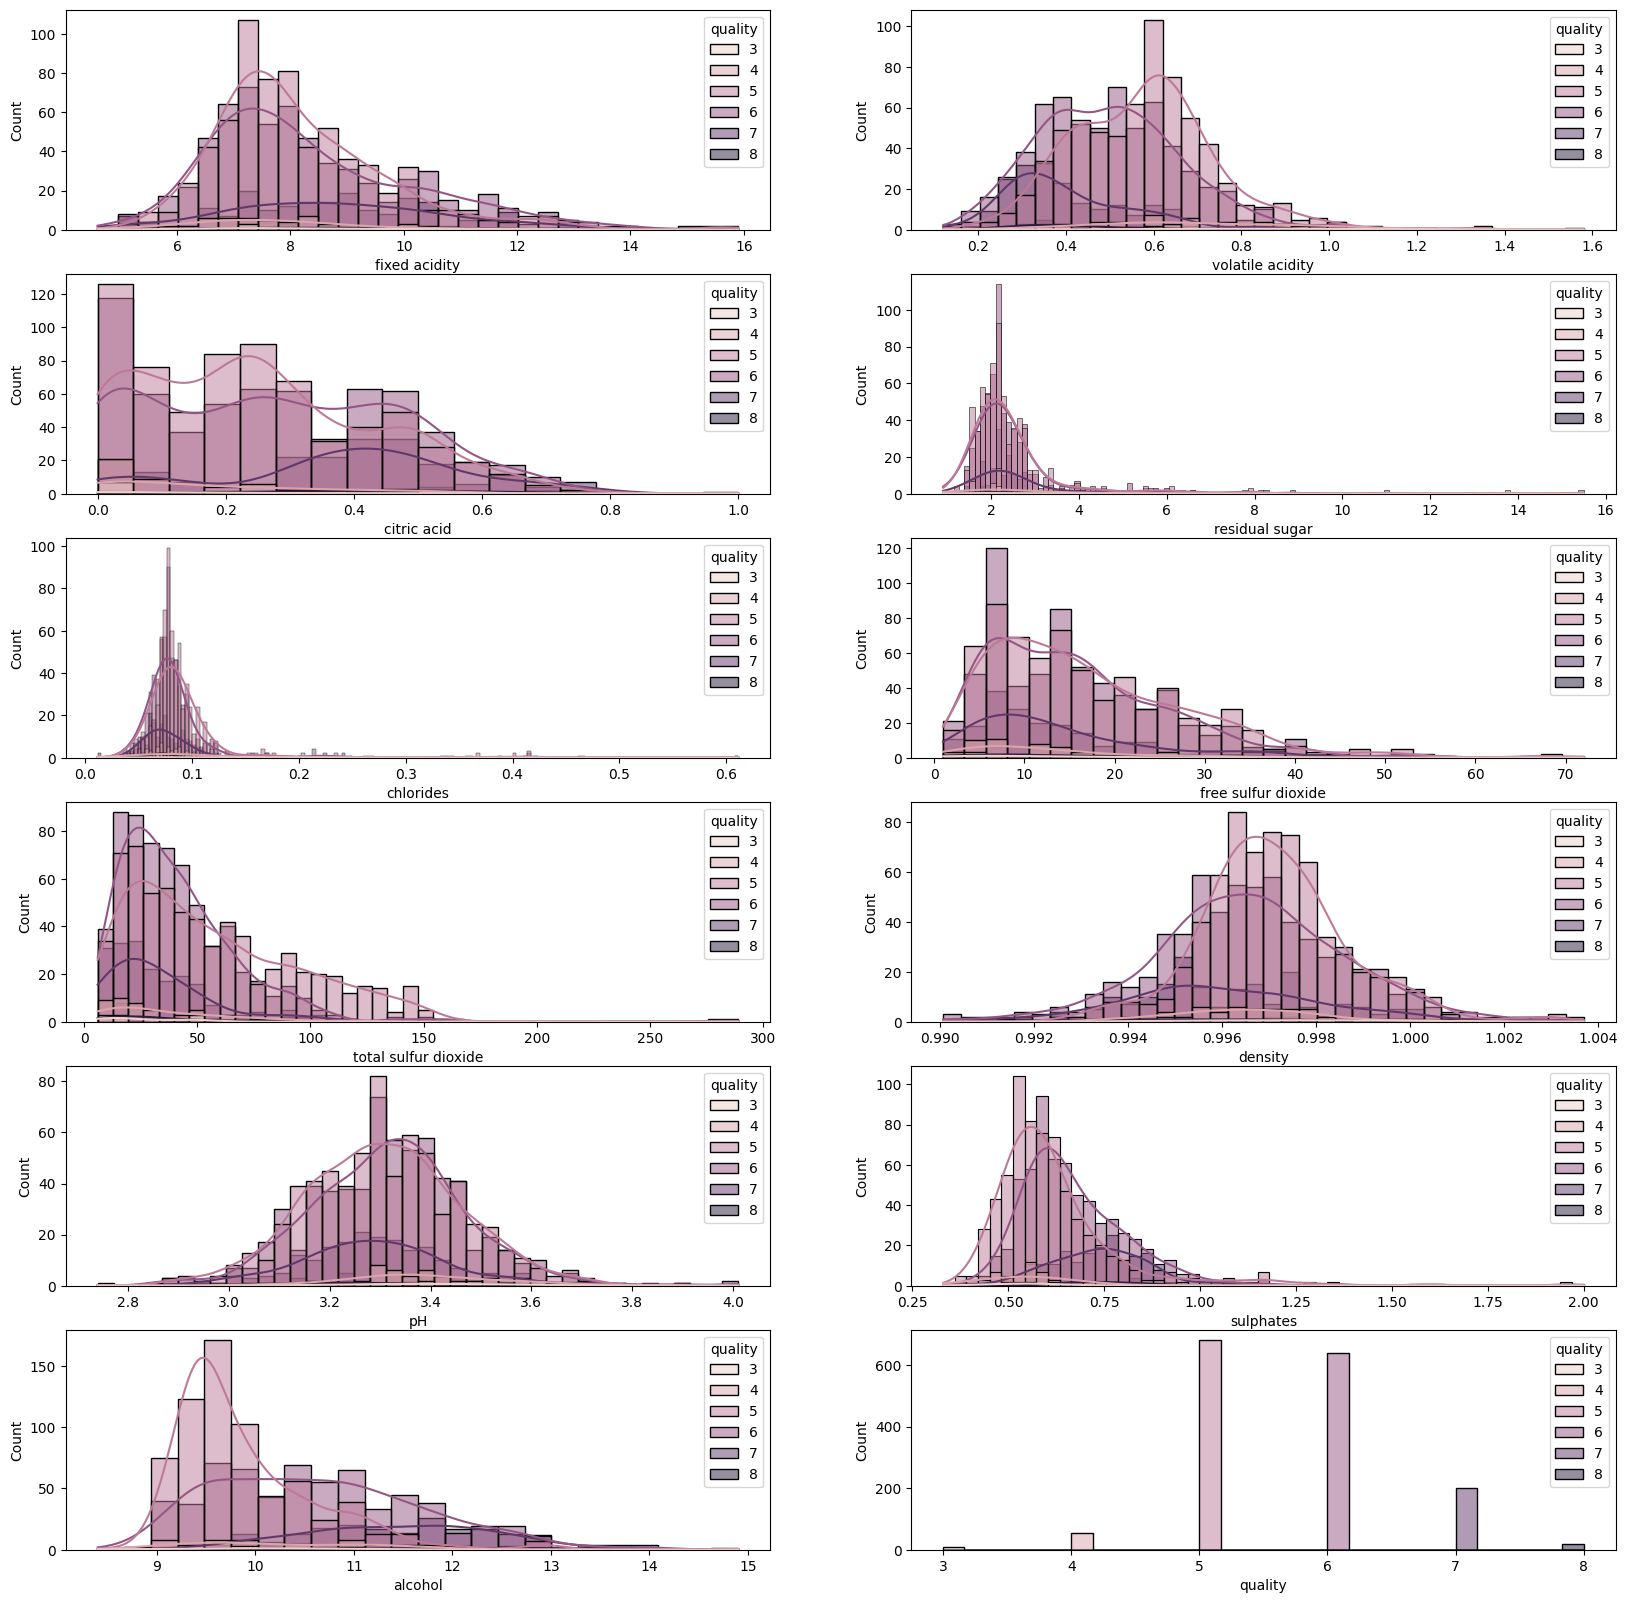

In [ ]:
plt.figure(figsize = (20,20))
i = 1;
for name in df.columns:
    plt.subplot(6,2,i)
    sns.histplot( data=df, x=name, hue="quality",kde=True )
    i = i + 1

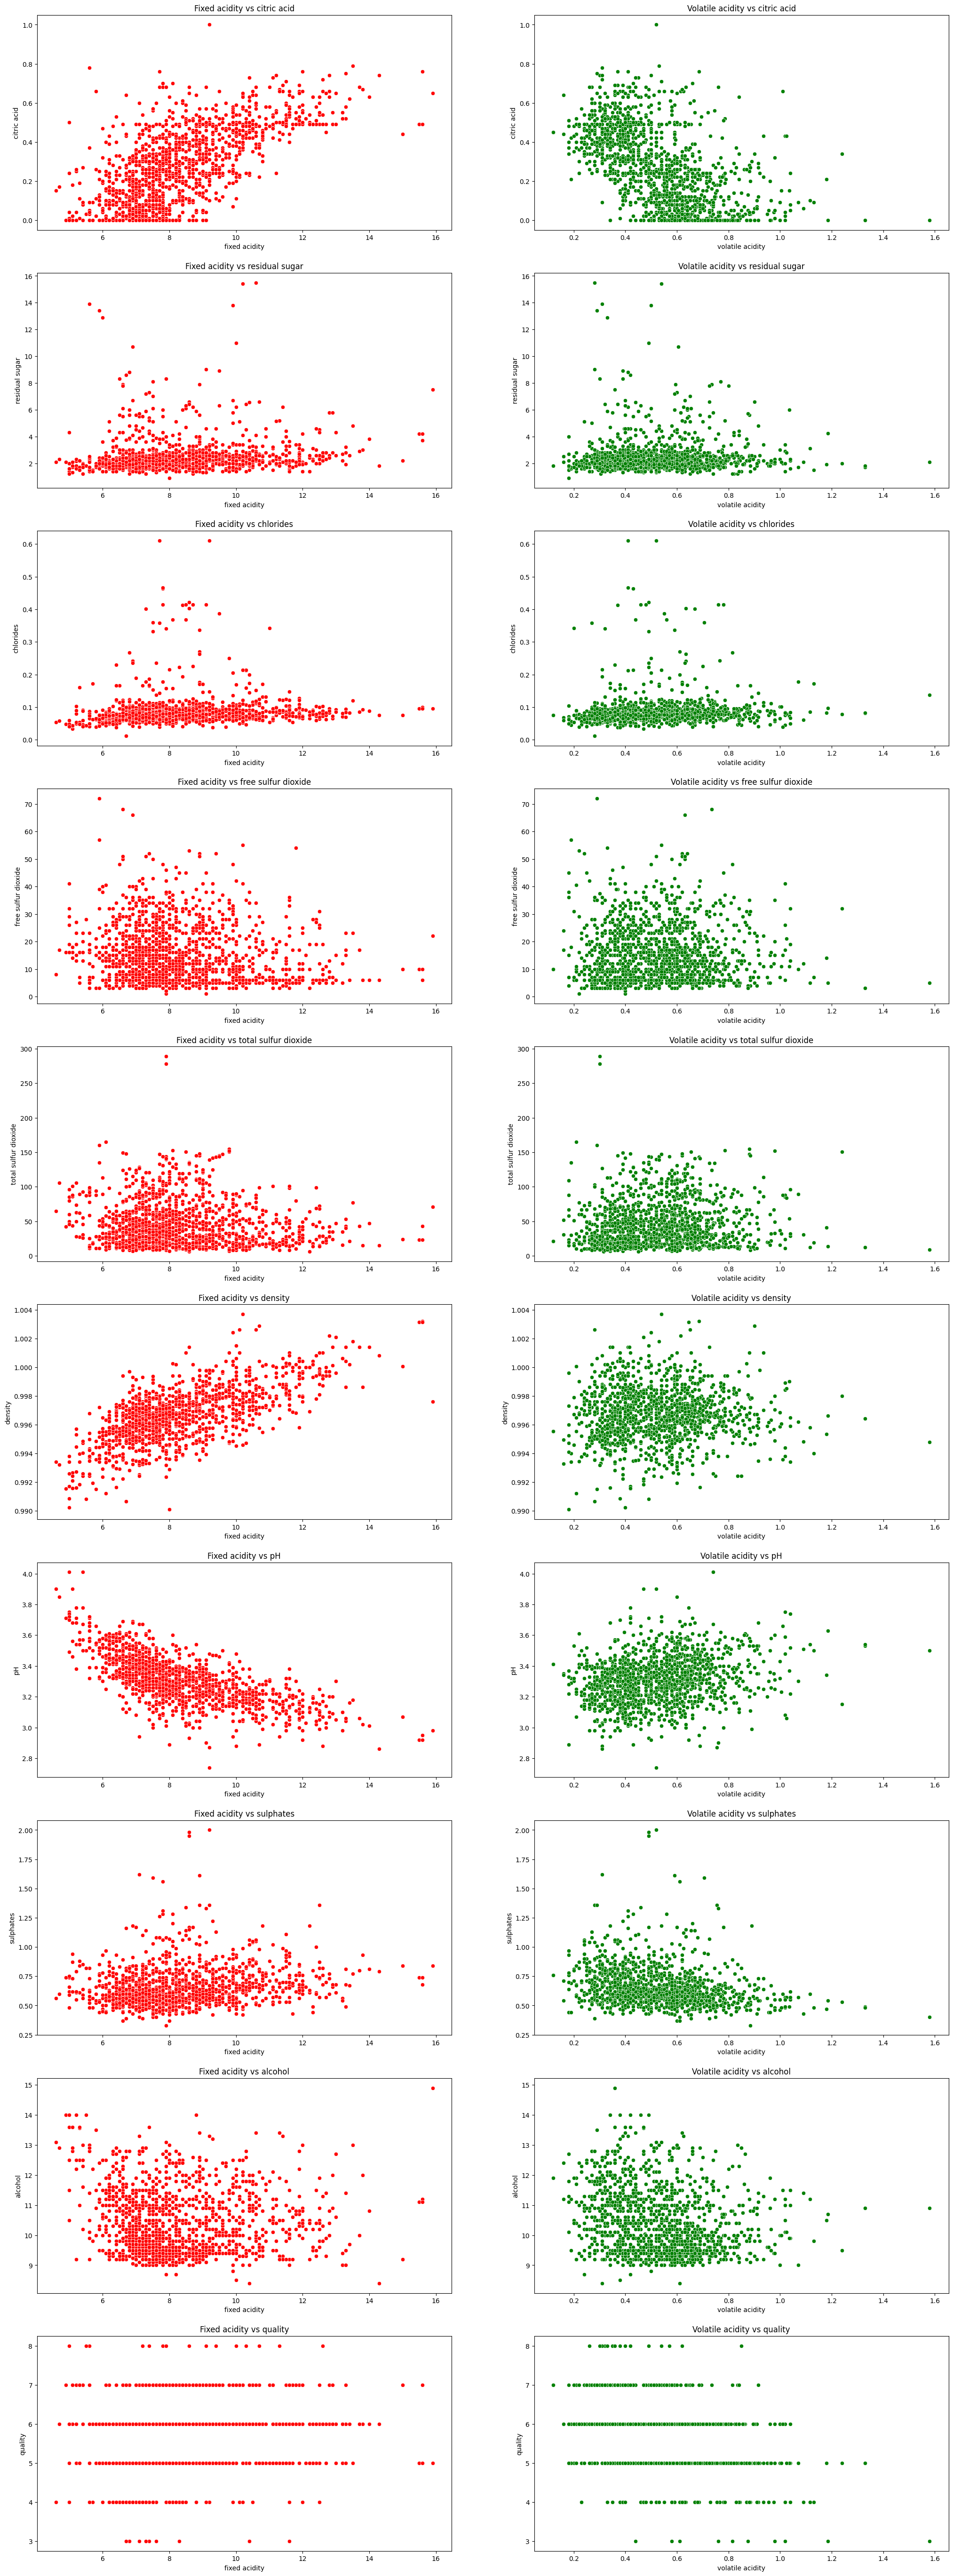

In [ ]:
columns = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(nrows=len(columns), ncols=2 , figsize=(25,70))

for i, column in enumerate(columns):
    # Plotting the first graph (Fixed acidity vs column)
    ax = axes[i][0]
    ax.set_title("Fixed acidity vs " + column)
    sns.scatterplot(data=df, x='fixed acidity', y=column, color='red', ax=ax)

    # Plotting the second graph (Volatile acidity vs column)
    ax = axes[i][1]
    ax.set_title("Volatile acidity vs " + column)
    sns.scatterplot(data=df, x='volatile acidity', y=column, color='green', ax=ax)

plt.show()


In [ ]:
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box plot for {column}')
    fig.show()


In [ ]:
#Removing outliers in residual sugar
lower = df['residual sugar'].mean()-3*df['residual sugar'].std()
upper = df['residual sugar'].mean()+3*df['residual sugar'].std()
df = df[(df['residual sugar']>lower) & (df['residual sugar']<upper)]

#Removing outliers in free sulfur dioxide
lower = df['free sulfur dioxide'].mean()-3*df['free sulfur dioxide'].std()
upper = df['free sulfur dioxide'].mean()+3*df['free sulfur dioxide'].std()
df = df[(df['free sulfur dioxide']>lower) & (df['free sulfur dioxide']<upper)]

#Removing outliers in total sulfur dioxide
lower = df['total sulfur dioxide'].mean()-3*df['total sulfur dioxide'].std()
upper = df['total sulfur dioxide'].mean()+3*df['total sulfur dioxide'].std()
df = df[(df['total sulfur dioxide']>lower) & (df['total sulfur dioxide']<upper)]

In [ ]:
sc = StandardScaler()
df['quality']= LabelEncoder().fit_transform(df['quality'])
X,Y=df.drop('quality' , axis=1),df['quality']

X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.25)

-------------------------Model 1 Random Forest -----------------------
Score :  100.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         9
           2       0.74      0.82      0.78       158
           3       0.68      0.73      0.70       156
           4       0.78      0.60      0.68        53
           5       0.00      0.00      0.00         4

    accuracy                           0.72       383
   macro avg       0.37      0.36      0.36       383
weighted avg       0.69      0.72      0.70       383



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



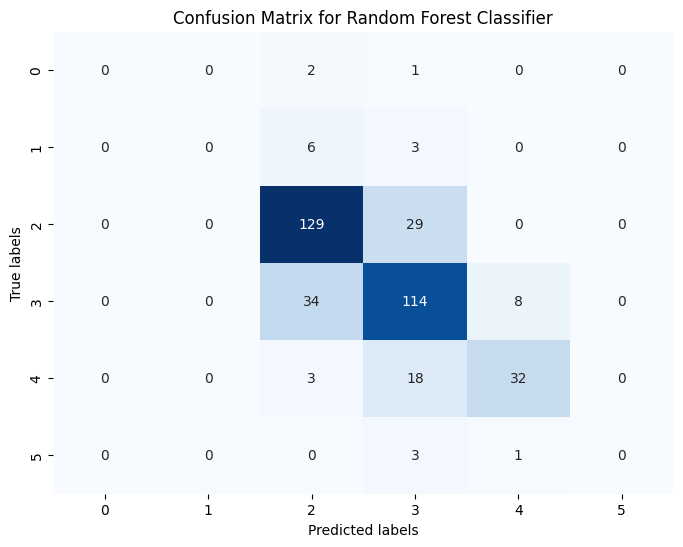

In [ ]:
print("-------------------------Model 1 Random Forest -----------------------")

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print("Score : ",forest.score(X_train, y_train)*100 , "%")

expected = y_test
predicted = forest.predict(X_test)
print(metrics.classification_report(expected, predicted))
conf_matrix = metrics.confusion_matrix(expected, predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

-------------------------Model 2 Multinomial SVM-----------------------
Score :  57.417102966841185 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         9
           2       0.65      0.80      0.72       158
           3       0.53      0.64      0.58       156
           4       0.00      0.00      0.00        53
           5       0.00      0.00      0.00         4

    accuracy                           0.59       383
   macro avg       0.20      0.24      0.22       383
weighted avg       0.48      0.59      0.53       383



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



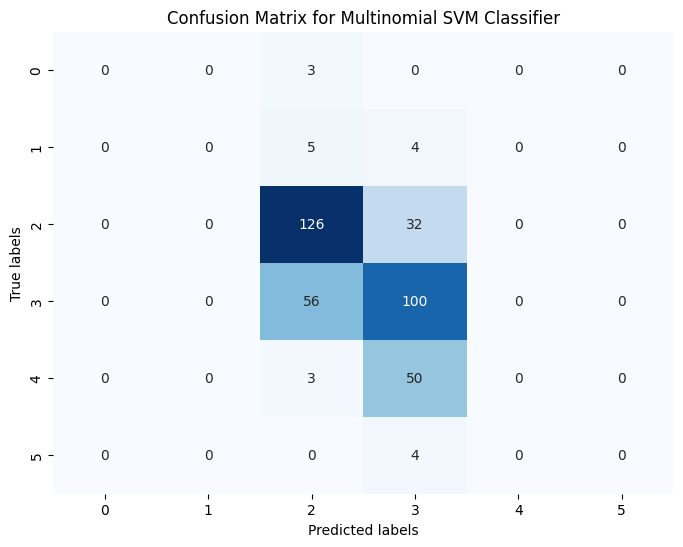

In [ ]:
print("-------------------------Model 2 Multinomial SVM-----------------------")

# Define the Multinomial SVM model
svm_model = SVC(kernel='linear', decision_function_shape='ovr')

# Train the model
svm_model.fit(X_train, y_train)
print("Score : ", svm_model.score(X_train, y_train) * 100, "%")

# Make predictions
expected = y_test
predicted = svm_model.predict(X_test)

# Print classification report
print(metrics.classification_report(expected, predicted))

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(expected, predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Multinomial SVM Classifier")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


-------------------------Model 3 XGBoost-----------------------
Score :  100.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.11      0.20         9
           2       0.77      0.80      0.78       158
           3       0.69      0.74      0.71       156
           4       0.73      0.72      0.72        53
           5       0.00      0.00      0.00         4

    accuracy                           0.73       383
   macro avg       0.53      0.39      0.40       383
weighted avg       0.72      0.73      0.72       383



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



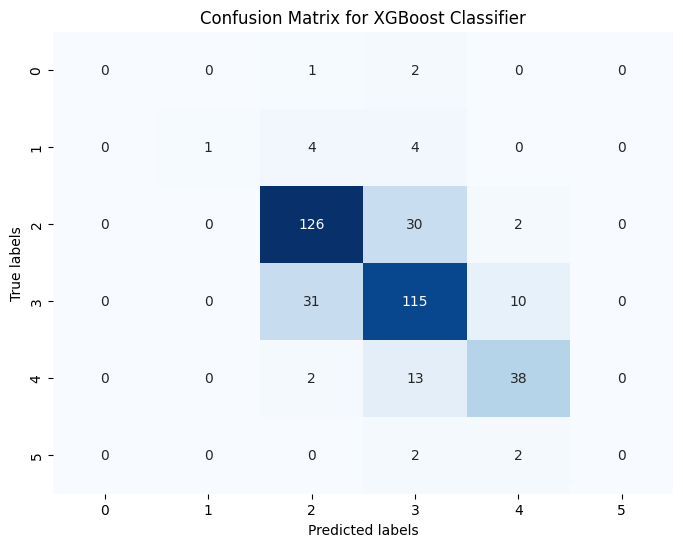

In [ ]:
print("-------------------------Model 3 XGBoost-----------------------")
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)
print("Score : ", xgb_model.score(X_train, y_train) * 100, "%")

# Make predictions
expected = y_test
predicted = xgb_model.predict(X_test)

# Print classification report
print(metrics.classification_report(expected, predicted))

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(expected, predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()
